In [1]:
import csv
import os
import time

In [2]:
#IMPORT LIBRARY'S TO MANIPULATION

In [3]:
import numpy as np
import pandas as pd

In [4]:
#

In [5]:
os.chdir('C:/Users/diego/OneDrive/Escritorio/Proyectos para Git/Elecciones 2021//')
#os.chdir('../Elecciones 2021//')

In [6]:
#ACCESS DATAFRAME

In [7]:
data=pd.read_csv('Padrón_Ausentes_Cordenadas.csv',encoding='ISO-8859-1')

In [8]:
data.head()

,Apellidos,Nombres,Año,Edad,Dni,Lat,Long
0,ACEVEDO SANCHEZ,ANTONIO EDUARDO,2002,19,44225159,-36.004620,-58.140367
1,ACOSTA,CARLOS ALBERTO,1964,57,16806749,-36.004359,-58.144452
2,ALARCON,SEBASTIAN,1989,32,34384709,-34.842844,-58.449667
3,ALEGRE,ROCIO ROSANA,1989,32,35435718,-36.322049,-58.565482
4,ALFONSIN,MARIA MILAGROS,1998,23,46607728,-36.004593,-58.140594


In [ ]:
mean_lat=data["Lat"].mean()
mean_lon=data["Long"].mean()

In [ ]:
print(mean_lat)
print(mean_lon)

In [ ]:
std_lat=data["Lat"].std()
std_lon=data["Long"].std()

In [ ]:
data["Lat"]=(data["Lat"] - mean_lat)/(std_lat) 
data["Long"]=(data["Long"] -mean_lon ) /(std_lon)

In [ ]:
data.head()

In [9]:
#IMPORT LIBRARY'S TO K-MEANS 

In [10]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans


In [11]:
#DATA PRERARETION TO K-MEANS

In [12]:
x=data['Lat'].values
y=data['Long'].values
X=np.array(list(zip(x,y)))

In [13]:
n_sil=[]
n=0
for n in range(1,5):
    kmeans= KMeans(n_clusters=2*n, random_state=1).fit(X)
    labels =kmeans.predict(X)
    aux=metrics.silhouette_score(X,labels, metric='euclidean')
    n_sil.append([n,aux])

In [14]:
for n in range(0,len(n_sil)):
    print(n_sil[n])

[1, 0.9367123952246794]
[2, 0.6410889183526686]
[3, 0.6620544240855152]
[4, 0.5384615384615384]


In [15]:
max_sil=-999
max_sil2=-999
max_clus=-999
max_clus2=-999
for n in range(0,len(n_sil)):
    if( (max_sil<n_sil[n][1]) ):
            max_sil2=max_sil
            max_clus2=max_clus 
            max_sil=n_sil[n][1]
            max_clus=2*(n+1)
    else:
        if( (max_sil2<n_sil[n][1]) ):
            max_sil2=n_sil[n][1]
            max_clus2=2*(n+1)        

In [16]:
print('el cluster con n={} posee el mejor ind de sillhoute con s={}'.format(max_clus,round(max_sil,8)))
print('el cluster con n={} posee el segundo mejor ind de sillhoute con s={}'.format(max_clus2,round(max_sil2,8)))

el cluster con n=2 posee el mejor ind de sillhoute con s=0.9367124
el cluster con n=6 posee el segundo mejor ind de sillhoute con s=0.66205442


In [17]:
#Since we have at least 12 people in our team, 
#we prefer to lose performance in geographical 
#density and divide the work

In [18]:
#We apply K-means wit N_Clusters=max_clus2=6

In [19]:
import matplotlib.pyplot as plt

In [20]:
print(max_clus2)

6


In [29]:
#kmeans=KMeans(n_clusters=max_clus2)
kmeans=KMeans(n_clusters=max_clus2)
kmeans=kmeans.fit(X)
labels = kmeans.predict(X)
centroids=kmeans.cluster_centers_
colors=['m.','r.','c.','y.','b.','.']


In [30]:
X.shape

(13, 2)

lat y log: [-36.0046195 -58.1403669]  grupo:  4
lat y log: [-36.004359  -58.1444516]  grupo:  0
lat y log: [-34.842844  -58.4496666]  grupo:  1
lat y log: [-36.3220488 -58.5654817]  grupo:  2
lat y log: [-36.0045933 -58.1405939]  grupo:  4
lat y log: [-34.842844  -58.4496666]  grupo:  1
lat y log: [-36.0015646 -58.1434182]  grupo:  5
lat y log: [-35.9997321 -58.1413695]  grupo:  3
lat y log: [-35.9995929 -58.1391577]  grupo:  3
lat y log: [-34.842844  -58.4496666]  grupo:  1
lat y log: [-35.9997321 -58.1413695]  grupo:  3
lat y log: [-35.9997321 -58.1413695]  grupo:  3
lat y log: [-34.842844  -58.4496666]  grupo:  1


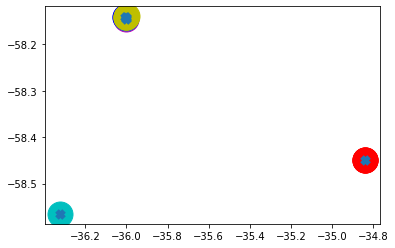

In [33]:
for i in range(len(X)):
    print('lat y log:',X[i],' grupo: ',labels[i])
    plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize=50)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,linewidth=5,zorder=10)
plt.show()

In [ ]:
plt.boxplot()

In [34]:
print(kmeans)

KMeans(n_clusters=6)
